##### Lab 8 Part 1 

##### Experimenting with svm kernels on IRIS dataset

In [1]:
import pandas as pd
from sklearn import preprocessing 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score

##### Function for a convenient svm plot

In [2]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [3]:
df=pd.read_csv("IRIS (2).csv")

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


##### After experimenting with this dataset, we decided to proceed with sepal_width and petal_length columns which were more non linearly distributed

In [5]:
df.drop("sepal_length",axis=1,inplace=True)
df.drop("petal_width",axis=1,inplace=True)

##### Observing the distribution of different species with repect to the chosen columns

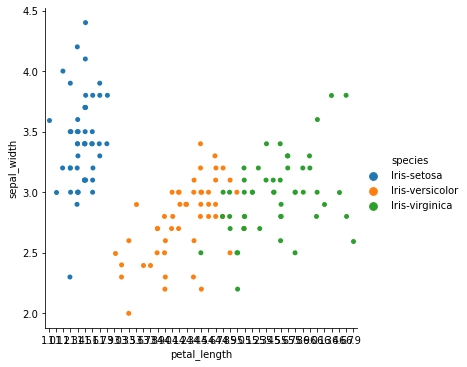

In [6]:
sns.catplot(x="petal_length", y="sepal_width",hue="species", data=df)

#####  Re-labelling the species column for convenience

In [7]:
for i in range(df.shape[0]):
    if df.loc[i,"species"]=="Iris-virginica":
        df.loc[i,"species"]=-1
    elif df.loc[i,"species"]=="Iris-versicolor":
        df.loc[i,"species"]=1
    else:
        df.loc[i,"species"]=2

##### Omitting the "Iris-setosa" because it is distinctly distributed from the other species which will result in a pretty easy svm classification

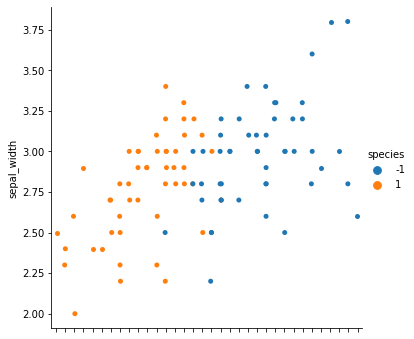

In [8]:
df_new=df[df["species"]!=2]
g=sns.catplot(x="petal_length", y="sepal_width",hue="species", data=df_new)
g.set(xticklabels=[])
g.set(xlabel=None)

##### Training a svm model with linear kernel

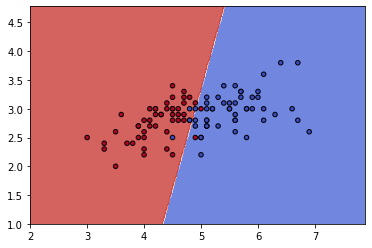

Accuracy for linear kernel is 93.0


In [19]:
svm = SVC(kernel='linear', C=1, random_state=0)
X=df_new.loc[:, ["petal_length","sepal_width"]].values
y=np.array(list(df_new["species"].values))
svm.fit(X,y)
fig, ax = plt.subplots()
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()
result=svm.predict(X)
print('Accuracy for linear kernel is {}'.format(100*sum(1 for i,j in zip(result,y) if i == j) / float(len(result))))

##### Training a SVM model with polynomial kernel

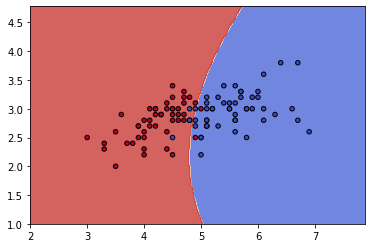

Accuracy for polynomial kernel is 93.0


In [23]:
svm = SVC(kernel='poly', C=1, random_state=0)
X=df_new.loc[:, ["petal_length","sepal_width"]].values
y=np.array(list(df_new["species"].values))
svm.fit(X,y)
fig, ax = plt.subplots()
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()
result=svm.predict(X)
print('Accuracy for polynomial kernel is {}'.format(100*sum(1 for i,j in zip(result,y) if i == j) / float(len(result))))

##### Training a SVM model with "Gaussian RBF(Radial Basis Function)" kernel

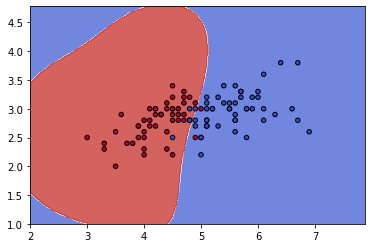

Accuracy for Gaussian kernel is 93.0


In [24]:
svm = SVC(kernel='rbf', gamma=1, random_state=0)
X=df_new.loc[:, ["petal_length","sepal_width"]].values
y=np.array(list(df_new["species"].values))
svm.fit(X,y)
fig, ax = plt.subplots()
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()
result=svm.predict(X)
print('Accuracy for Gaussian kernel is {}'.format(100*sum(1 for i,j in zip(result,y) if i == j) / float(len(result))))

##### LAB 8 Part2

##### Comparison of svm with KNN,NB and Rocchio using 20newsgroups dataset

##### 

##### Fetching data

In [26]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
train_data = fetch_20newsgroups(subset='train',categories=categories, shuffle=True, random_state=42)
test_data = fetch_20newsgroups(subset='test',categories=categories, shuffle=True, random_state=42)

In [3]:
train_data.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [27]:
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
x_train = train_data.data
x_test = test_data.data
for i in range(len(x_train)):
    li=x_train[i].split(" ")
    for j in range(len(li)):
        li[j]=wl.lemmatize(li[j].lower())
    strx=" ".join(li)
    x_train[i]=strx
for i in range(len(x_test)):
    li=x_test[i].split(" ")
    for j in range(len(li)):
        li[j]=wl.lemmatize(li[j].lower())
    strx=" ".join(li)
    x_test[i]=strx

In [5]:
x_train[0]

"from: lerxst@wam.umd.edu (where's my thing)\nsubject: what car is this!?\nnntp-posting-host: rac3.wam.umd.edu\norganization: university of maryland, college park\nlines: 15\n\n i wa wondering if anyone out there could enlighten me on this car i saw\nthe other day. it wa a 2-door sport car, looked to be from the late 60s/\nearly 70s. it wa called a bricklin. the door were really small. in addition,\nthe front bumper wa separate from the rest of the body. this is \nall i know. if anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nthanks,\n- il\n   ---- brought to you by your neighborhood lerxst ----\n\n\n\n\n"

##### Cleaning data(removing stop words and other unnecessary expressions)

##### 

##### For training data

In [28]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stop_li=stopwords.words('english')
for i in range(len(x_train)):   
    x=re.sub('#\S+',' ',x_train[i])
    x=re.sub('@\S+',' ',x)
    x=re.sub('\S+@\S+',' ',x)
    x=re.sub('https\S+',' ',x)
    x=re.sub('[^A-Za-z]',' ',x)
    x=re.sub('\d+',' ',x)
    li=[]
    for l in x.lower().split():
        if l.isalpha()==True:
            li.append(l)
    str2=""
    for l in li:
        if l not in stop_li:
                str2+=l+" "
    str_temp = word_tokenize(str2.lower())
    str3=""
    for k in str_temp:
        if(len(k)>2):
            str3+=k+" "
    x_train[i]=str3.strip()

In [12]:
x_train[0]

'lerxst thing subject car nntp posting host rac wam umd edu organization university maryland college park line wondering anyone could enlighten car saw day door sport car looked late early called bricklin door really small addition front bumper separate rest body know anyone tellme model name engine spec year production car made history whatever info funky looking car please mail thanks brought neighborhood lerxst'

##### For testing data

In [29]:
for i in range(len(x_test)):   
    x=re.sub('#\S+',' ',x_test[i])
    x=re.sub('@\S+',' ',x)
    x=re.sub('\S+@\S+',' ',x)
    x=re.sub('https\S+',' ',x)
    x=re.sub('[^A-Za-z]',' ',x)
    x=re.sub('\d+',' ',x)
    li=[]
    for l in x.lower().split():
        if l.isalpha()==True:
            li.append(l)
    str2=""
    for l in li:
        if l not in stop_li:
                str2+=l+" "
    str_temp = word_tokenize(str2.lower())
    str3=""
    for k in str_temp:
        str3+=lemmatizer.lemmatize(k)+" "
    x_test[i]=str3.strip()


##### Generating tf-idf vectors for training as well as test data to feed to all the models

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(stop_words='english', max_features=1000)
labels = tf.fit_transform(x_train+x_test)
labels_train = tf.transform(x_train)
labels_test = tf.transform(x_test)
labels_train.shape, labels_test.shape

((11314, 1000), (7532, 1000))

In [31]:
labels_train=labels_train.toarray()
labels_test=labels_test.toarray()

In [32]:
import pandas as pd
from sklearn import preprocessing 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score

##### Training a SVM model with "linear" kernel

In [33]:
svm_linear = SVC(kernel='linear', C=1, random_state=0)
X=labels_train
y=np.array(list(train_data.target))
svm_linear.fit(X,y)
y_pred=svm_linear.predict(labels_test)

In [39]:
y_test=np.array(list(test_data.target))
print("Accuracy of Linear kernel is: "+ str(accuracy_score(y_test, y_pred)*100)+"%")
print("Accuracy of Polynomial kernel is: "+ str(accuracy_score(y_test, y_pred_pol)*100)+"%")
print("Accuracy of Gaussian kernel is: "+ str(accuracy_score(y_test, y_pred_gaus)*100)+"%")

Accuracy of Linear kernel is: 68.09612320764738%
Accuracy of Polynomial kernel is: 64.97610196494955%
Accuracy of Gaussian kernel is: 70.33988316516198%


##### Training a SVM model with "polynomial" kernel

In [36]:
svm_poly = SVC(kernel='poly', C=1, random_state=0)
X=labels_train
y=np.array(list(train_data.target))
svm_poly.fit(X,y)
y_pred_pol=svm_poly.predict(labels_test)

In [32]:
y_test=np.array(list(test_data.target))
accuracy_score(y_test, y_pred)

0.5724907063197026

##### Training a SVM model with "Gaussian RBF(Radial Basis Function)" kernel

In [37]:
svm_rbf = SVC(kernel='rbf', gamma=1, random_state=0)
X=labels_train
y=np.array(list(train_data.target))
svm_rbf.fit(X,y)
y_pred_gaus=svm_rbf.predict(labels_test)

In [34]:
y_test=np.array(list(test_data.target))
accuracy_score(y_test, y_pred)

0.6820233669676049

##### The svm model with rbf kernel gave the best results

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

##### Training a KNN model

In [42]:
knn = KNeighborsClassifier(n_neighbors=7)
clf = knn.fit(labels_train,np.array(list(train_data.target)))
y_pred_knn = clf.predict(labels_test)
y_test=np.array(list(test_data.target))
score_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of the trained KNN model is: "+str(100*score_knn )+"%")

Accuracy of the trained KNN model is: 56.95698353690919%


##### Training a naive bayes model

In [43]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(labels_train,np.array(list(train_data.target)))
y_pred_nb = naive_bayes_classifier.predict(labels_test)
y_test=np.array(list(test_data.target))
score_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy of the trained Naive Bayes model is: "+str(100*score_nb)+"%")

Accuracy of the trained Naive Bayes model is: 70.18056293149229%


##### Training a rocchio classifier model

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import pairwise_distances
metric="euclidean"
vectorizer=TfidfVectorizer()
trainX = vectorizer.fit_transform(train_data.data) 
trainy = train_data.target
vectorizer=TfidfVectorizer()
trainX = vectorizer.fit_transform(train_data.data) 
trainy = train_data.target
n_samples, n_features = trainX.shape
le = LabelEncoder()
y_indices = le.fit_transform(trainy)
classes = le.classes_
n_classes = classes.size
centroids = np.empty((n_classes, n_features), dtype=np.float64)
n_cluster = np.zeros(n_classes)
for current_class in range(n_classes):
    center_mask = y_indices == current_class
    n_cluster[current_class] = np.sum(center_mask)
    centroids[current_class] = trainX[center_mask].mean(axis=0)
def get_vectorizer_array(query):
    return vectorizer.transform([query]).toarray()
def pred(X):
    return classes[pairwise_distances(X, centroids, metric=metric).argmin(axis=1)]
y_test=np.array(list(test_data.target))
testdata = [[a_, b_] for a_, b_ in zip(test_data.data,test_data.target)]
y_pred_rcc=[pred(get_vectorizer_array(testcase[0]))[0] for testcase in testdata]
score_rcc = accuracy_score(y_test, y_pred_rcc)
print("Accuracy of the trained Rocchio Classification model is: "+str(100*score_rcc)+"%")

Accuracy of the trained Rocchio Classification model is: 73.55284121083378%


##### classification report for rach model

In [45]:
from sklearn.metrics import classification_report
target_names = categories

In [46]:
print(classification_report(y_test, y_pred, target_names=target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.58      0.60      0.59       319
           comp.graphics       0.54      0.60      0.57       389
 comp.os.ms-windows.misc       0.72      0.56      0.63       394
comp.sys.ibm.pc.hardware       0.50      0.64      0.56       392
   comp.sys.mac.hardware       0.65      0.62      0.63       385
          comp.windows.x       0.65      0.61      0.63       395
            misc.forsale       0.70      0.81      0.75       390
               rec.autos       0.78      0.72      0.75       396
         rec.motorcycles       0.83      0.77      0.80       398
      rec.sport.baseball       0.72      0.78      0.75       397
        rec.sport.hockey       0.94      0.78      0.85       399
               sci.crypt       0.93      0.74      0.82       396
         sci.electronics       0.42      0.67      0.52       393
                 sci.med       0.65      0.69      0.67       396
         

In [47]:
print(classification_report(y_test, y_pred_knn, target_names=target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.42      0.53      0.47       319
           comp.graphics       0.38      0.47      0.42       389
 comp.os.ms-windows.misc       0.44      0.57      0.49       394
comp.sys.ibm.pc.hardware       0.35      0.51      0.42       392
   comp.sys.mac.hardware       0.47      0.45      0.46       385
          comp.windows.x       0.44      0.53      0.48       395
            misc.forsale       0.50      0.54      0.52       390
               rec.autos       0.60      0.53      0.56       396
         rec.motorcycles       0.63      0.61      0.62       398
      rec.sport.baseball       0.51      0.53      0.52       397
        rec.sport.hockey       0.67      0.69      0.68       399
               sci.crypt       0.77      0.66      0.71       396
         sci.electronics       0.50      0.33      0.40       393
                 sci.med       0.66      0.41      0.51       396
         

In [48]:
print(classification_report(y_test, y_pred_nb, target_names=target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.56      0.61      0.59       319
           comp.graphics       0.51      0.62      0.56       389
 comp.os.ms-windows.misc       0.63      0.65      0.64       394
comp.sys.ibm.pc.hardware       0.54      0.56      0.55       392
   comp.sys.mac.hardware       0.62      0.63      0.63       385
          comp.windows.x       0.63      0.68      0.65       395
            misc.forsale       0.68      0.81      0.74       390
               rec.autos       0.75      0.70      0.72       396
         rec.motorcycles       0.72      0.79      0.75       398
      rec.sport.baseball       0.71      0.78      0.74       397
        rec.sport.hockey       0.82      0.84      0.83       399
               sci.crypt       0.90      0.76      0.82       396
         sci.electronics       0.57      0.53      0.55       393
                 sci.med       0.74      0.64      0.69       396
         

In [49]:
print(classification_report(y_test, y_pred_rcc, target_names=target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.71      0.55      0.62       319
           comp.graphics       0.55      0.76      0.64       389
 comp.os.ms-windows.misc       0.74      0.58      0.65       394
comp.sys.ibm.pc.hardware       0.64      0.59      0.61       392
   comp.sys.mac.hardware       0.73      0.74      0.73       385
          comp.windows.x       0.79      0.69      0.74       395
            misc.forsale       0.68      0.82      0.74       390
               rec.autos       0.88      0.72      0.79       396
         rec.motorcycles       0.97      0.88      0.93       398
      rec.sport.baseball       0.92      0.87      0.89       397
        rec.sport.hockey       0.97      0.85      0.90       399
               sci.crypt       0.95      0.66      0.78       396
         sci.electronics       0.31      0.81      0.45       393
                 sci.med       0.92      0.62      0.74       396
         

In [62]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred_knn,average='macro'))
print(precision_score(y_test, y_pred_nb,average='macro'))
print(precision_score(y_test, y_pred_rcc,average='macro'))
print(precision_score(y_test, y_pred,average='macro'))

0.5806651951394515
0.7086098102291571
0.7815187444875697
0.6856428769754113


In [63]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred_knn,average='macro'))
print(f1_score(y_test, y_pred_nb,average='macro'))
print(f1_score(y_test, y_pred_rcc,average='macro'))
print(f1_score(y_test, y_pred,average='macro'))

0.5671759598064628
0.6900894855401902
0.7418023429510718
0.6765011505568592


In [64]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred_knn,average='macro'))
print(recall_score(y_test, y_pred_nb,average='macro'))
print(recall_score(y_test, y_pred_rcc,average='macro'))
print(recall_score(y_test, y_pred,average='macro'))

0.5643073489248479
0.6906342678079089
0.7276265363032688
0.6731401407195607


In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)

In [58]:
tp_and_fn = cm.sum(1)
tp_and_fp = cm.sum(0)
tp = cm.diagonal()

precision = tp / tp_and_fp
recall = tp / tp_and_fn

In [60]:
precision

array([0.43478261, 0.41629956, 0.43832599, 0.3721374 , 0.48901099,
       0.45341615, 0.54814815, 0.63636364, 0.66849315, 0.58090186,
       0.614     , 0.83040936, 0.46464646, 0.6557971 , 0.81741573,
       0.62302483, 0.63611111, 0.81028939, 0.60474308, 0.51898734])